 ## Exercício em Grupo (EG01)

Este notebook apresenta um roteiro para a realização da avaliação EG01. Esta atividade deve ser realizada de forma presencial no laboratório por grupos de 2 alunos (excepcionalmente 3 alunos).

**Orientações Gerais**:


* Implemente a função ou testes solicitados sem realizar qualquer alteração em sua assinatura (nomes e parâmetros), visto que esta avaliação terá como parte de sua correção a execução de testes automáticos;

* Os grupos devem implementar as soluções *exclusivamente* através da representação e manipulação de grafos usando NetworkX juntamente com construções gerais de Python quando indispensável;

* Para entregar é só salvar o notebook  e anexar na tarefa no classroom (não anexar o link, mas o notebook em si). Apenas um dos alunos precisa entregar e os nomes dos demais participantes devem ser anotados lá como comentário. Serão considerados apenas nomes de alunos que estiveram presentes na aula. 


**Referências**:
- Notebooks das aulas anteriores 

- https://networkx.org/documentation/networkx-3.0/


*Atenção:* Os blocos de código neste roteiro, especialmente referentes a instalação e importação e definições auxiliares, devem ser executados na sequência em que são apresentados abaixo, antes de cada uso deste notebook, a fim de garantir que as definições necessárias em cada trecho foram devidamente importadas/criadas.

# Instalação e Importação de Pacotes e Arquivos


In [ ]:
# Pacote básico
import networkx as nx
!pip show networkx

# Pacotes auxiliares
#!pip install scipy --upgrade
!pip install parameterized
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/util/networkx_util.py
from networkx_util import draw_graph, read_multiple_CSV

# Download de arquivos de grafos usados neste notebook
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/m-u-cy-sc-p-01.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/p-u-cy-sc-p-ch-01.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/s-u-cy-sc-p-01.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/s-u-cy-sc-p-05.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/s-u-a-sc-p-t-b-03.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/s-u-cy-sc-p-06.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/s-u-cy-sc-p-b-01.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/s-u-cy-sc-p-03.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/K3-3.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/K1.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/K5.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/Cycle6.graphml
!wget https://raw.githubusercontent.com/pdlmachado/gtufcg/main/graphs/Empty6.graphml

# Funções e pacotes para teste
import unittest
from parameterized import parameterized

Name: networkx
Version: 3.0
Summary: Python package for creating and manipulating graphs and networks
Home-page: https://networkx.org/
Author: Aric Hagberg
Author-email: hagberg@lanl.gov
License: 
Location: /usr/local/lib/python3.9/dist-packages
Requires: 
Required-by: hyperopt, python-louvain, scikit-image, visions
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-28 14:14:12--  https://raw.githubusercontent.com/pdlmachado/gtufcg/main/util/networkx_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7372 (7.2K) [text/plain]
Saving to: ‘networkx_util.py’

networkx_util.py    100%[===================>]   7.20K  --.-KB/s    in 0s      

2023-03-28 14:14:12 (63.1 MB/s) - ‘networkx_util.py’ saved [73

# Turma 02 - Grupo 1: Triângulos

Implemente a função **triangles** que recebe um grafo simples G como entrada e retorna uma lista com grupos de 3 vértices que são mutuamente adjacentes entre si. 
Como exemplo, considere o grafo G, onde:

    V(G) = {0,1,2,3}
    E(G) = {01,02,12,13,23}

Este grafo possui dois grupos de vértices mutuamente adjacentes. Portanto, a função deverá retornar a seguinte lista:

    [[0,1,2], [1,2,3]]

Os vértices e as listas não precisam estar necessariamente na nesta ordem.



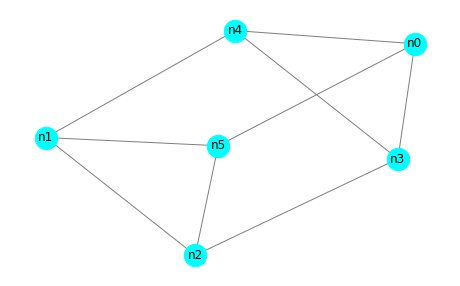

Vértices: ['n0', 'n1', 'n2', 'n3', 'n4', 'n5']
Arestas: [('n0', 'n4'), ('n0', 'n5'), ('n0', 'n3'), ('n1', 'n2'), ('n1', 'n4'), ('n1', 'n5'), ('n2', 'n3'), ('n2', 'n5'), ('n3', 'n4')]

[['n0', 'n3', 'n4'], ['n1', 'n2', 'n5']]


In [ ]:
#@title  { run: "auto", vertical-output: true }
filename1 = "s-u-cy-sc-p-06.graphml" #@param ["m-u-cy-sc-p-01.graphml", "p-u-cy-sc-p-ch-01.graphml", "s-u-cy-sc-p-01.graphml", "s-u-cy-sc-p-05.graphml", "s-u-a-sc-p-t-b-03.graphml", "s-u-cy-sc-p-06.graphml", "s-u-cy-sc-p-b-01.graphml", "s-u-cy-sc-p-03.graphml", "K3-3.graphml", "Cycle6.graphml", "Empty6.graphml"]
layout1 = "spring_layout" #@param ["circular_layout", "kamada_kawai_layout", "planar_layout", "random_layout", "shell_layout", "spring_layout", "spectral_layout", "spiral_layout"]

def triangles (G):
  lista = []
  if G is None:
    return None

  if G.number_of_nodes() <= 2:
    return lista

  nodes = list(G.nodes)
  for u in range(len(G.nodes)):
    for v in range(u+1, len(G.nodes)):
      for w in range(u+2, len(G.nodes)):
        if G.has_edge(nodes[u],nodes[v]) and G.has_edge(nodes[v],nodes[w]) and G.has_edge(nodes[w],nodes[u]):
          lista.append([nodes[u], nodes[v], nodes[w]])

  for u in range(len(lista) - 2, -1, -1):
    lista[u].sort()
    lista[u+1].sort()
    if lista[u] == lista[u+1]:
      lista.remove(lista[u])

  return lista


# Exemplo de uso da função
G1 = nx.read_graphml(filename1)
draw_graph(G1,eval(f"nx.{layout1}(G1)"))
print(f"Vértices: {G1.nodes}")
print(f"Arestas: {G1.edges}\n") 
print(triangles(G1))




## Testes Automáticos

In [ ]:
from networkx.classes.function import non_neighbors
# Testes Automáticos para a função non_neighbor

# Test Data
Null = nx.Graph()
Trivial = nx.complete_graph(1)
K3 = nx.complete_graph(3)
K5 = nx.complete_graph(5)
K3_3 = nx.complete_multipartite_graph([0,1,2],[3,4,5])
E6 = nx.empty_graph(6)
W4 = nx.wheel_graph(4)
Bull = nx.bull_graph()

class Test_triangles (unittest.TestCase):

  @parameterized.expand([
      ['Null',Null,[]],
      ['Grafo Trivial', Trivial, []],
      ['K3',K3,[[0, 1, 2]]],
      ['K5',K5,[[0, 1, 2],[0, 1, 3],[0, 1, 4],[0, 2, 3],[0, 4, 2],[0, 3, 4],[1, 2, 3],[1, 2, 4],[1, 3, 4],[2, 3, 4]]],
      ['K3_3',K3_3,[]],
      ['E6',E6,[]],
      ['W4',W4,[[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]],
      ['Bull',Bull,[[2,1,0]]],
  ])

  def test_base (self,name,G,expected_result):
    result = triangles(G)
    self.assertEqual(len(result),len(expected_result))
    self.assertTrue(all(any(set(l2)==set(l1) for l1 in expected_result) for l2 in result))

  def test_None (self):
    self.assertTrue(triangles(None) is None)

# call your test
unittest.main(argv=[''], defaultTest='Test_triangles', verbosity=2, exit=False)

test_None (__main__.Test_triangles) ... ok
test_base_0_Null (__main__.Test_triangles) ... ok
test_base_1_Grafo_Trivial (__main__.Test_triangles) ... ok
test_base_2_K3 (__main__.Test_triangles) ... ok
test_base_3_K5 (__main__.Test_triangles) ... FAIL
test_base_4_K3_3 (__main__.Test_triangles) ... ok
test_base_5_E6 (__main__.Test_triangles) ... ok
test_base_6_W4 (__main__.Test_triangles) ... ok
test_base_7_Bull (__main__.Test_triangles) ... ok

FAIL: test_base_3_K5 (__main__.Test_triangles)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/parameterized/parameterized.py", line 620, in standalone_func
    return func(*(a + p.args), **p.kwargs, **kw)
  File "<ipython-input-32-488cb305e505>", line 29, in test_base
    self.assertEqual(len(result),len(expected_result))
AssertionError: 13 != 10

----------------------------------------------------------------------
Ran 9 tests in 0.042s

FAI